## [Data-Visualization_Inferential-Statistics]
<br/>

- Pandas의 df 데이터 주요 지표 확인
    - pd.Series(df명).describe()
    - 주요 지표 : 데이터 수, 평균, 표준편차, 최소값, Q1~Q3, 최대값, 데이터 타입
    <br/><br/>

- 1차원 데이터 시각화 방법 : 도수분포표
    - np.histogram(Numpy배열, bins=?, range=(?, ?))
    * 리스트 내부에서 for문 사용하는 방법 >>> freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
    <br/><br/>
    
- 계급값, 상대도수 누적상대도수 구하기
    1. 계급값 >>> class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
    2. 상대도수 >>> rel_freq = freq / np.sum(freq)
    3. 누적상대도수 >>> np.cumsum(rel_freq)
    <br/><br/>

- 기존 DataFrame에 새로운 열 추가
    - freq_dist_df['class value'] = class_value
    - freq_dist_df['rel_freq'] = rel_freq
    - freq_dist_df['cum_rel_freq'] = cum_rel_freq
    * 열의 순서 정하기 >>> freq_dist_df = freq_dist_df[['class value', 'frequency', 'rel_freq', 'cum_rel_freq']]
    <br/><br/>

- Matplotlib 사용하여 그래프 그리기
    - import matplotlib.pyplot as plt
    - figure = plt.figure
    - fig = plt.figure(figsize=(10, 6))
    - ax = fig.add_subplot(111)
    - ...
    - ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
    - ax.set_xticks(np.linspace(1.5, 6.5, 6))
    - ax.set_xticklabels(np.arange(1, 7))
    - ax.set_xlabel('dice')
    - ax.set_ylabel('relative frequency')
    - plt.show()
    <br/><br/>

- 1차원 데이터 시각화 방법 : 히스토그램
    - freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
    <br/><br/>

- 2차원 데이터 시각화 방법 : 산점도
    - ax.scatter(english_scores, math_scores)
    <br/><br/>
    
- 2차원 데이터 시각화 방법 : 히트맵
    - c = ax.hist2d(english_scores, math_scores, bins=[9, 8], range=[(35, 80), (55, 95)])
    - ax.set_xlabel('english')
    - ax.set_ylabel('mathematics')
    - ax.set_xticks(c[1])
    - ax.set_yticks(c[2])
    - fig.colorbar(c[3], ax=ax)
    <br/><br/>

In [13]:
# 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/User/Jupyter/statistical_analysis/data/ch2_scores_em.csv', index_col = 'student number')

df
# df.head()

print(df.shape, len(df))

(50, 2) 50


In [21]:
english_scores = np.array(df['english'])
np.shape(english_scores)

(50,)

In [37]:
# 데이터의 주요 지표 확인

pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [24]:
# 도수분포표

freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
print(freq)

[ 0  0  0  2  8 16 18  6  0  0]


In [38]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
print(freq_class)

['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']


In [32]:
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))

In [35]:
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [41]:
a = [i for i in range(0, 100, 10)]
print(a)

b = [i for i in freq_class]
print(b)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']


In [45]:
# 계급값, 상대도수, 누적상대도수

# 계급값
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]          # //:나눴을 때의 몫을 의미
print(class_value)

# 상대도수
rel_freq = freq / freq.sum()
print(rel_freq)

# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
print(cum_rel_freq)

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
[0.   0.   0.   0.04 0.16 0.32 0.36 0.12 0.   0.  ]
[0.   0.   0.   0.04 0.2  0.52 0.88 1.   1.   1.  ]


In [49]:
# 이전에 만든 도수분포표에 계급값, 상대도수, 누적상대도수 열 추가
freq_dist_df['class value'] = class_value

freq_dist_df['rel_freq'] = rel_freq

freq_dist_df['cum_rel_freq'] = cum_rel_freq

freq_dist_df = freq_dist_df[['class value', 'frequency', 'rel_freq', 'cum_rel_freq']]

freq_dist_df

,class value,frequency,rel_freq,cum_rel_freq
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


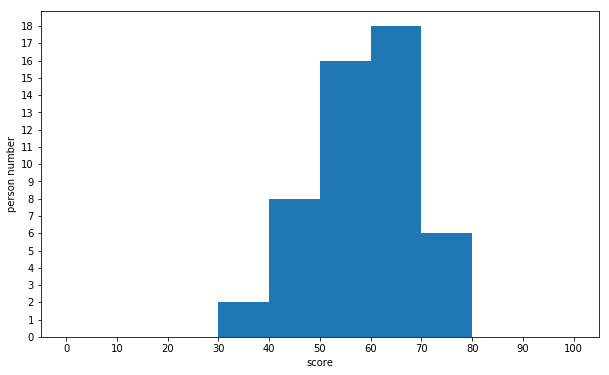

In [62]:
# 1차원 데이터 시각화 방법

# 히스토그램

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

ax.set_xlabel('score')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

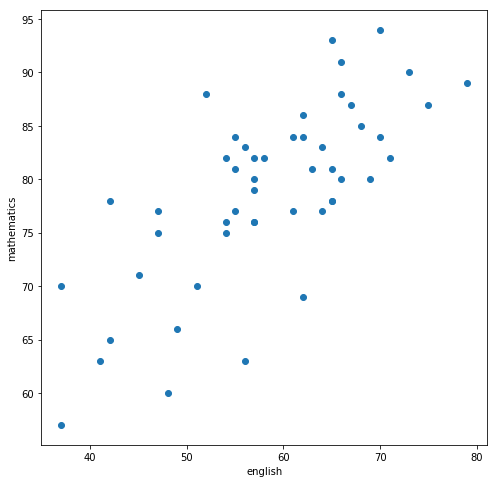

In [66]:
# 2차원 데이터 시각화 방법

# 산점도(scatter plot)

import matplotlib.pyplot as plt
%matplotlib inline

english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

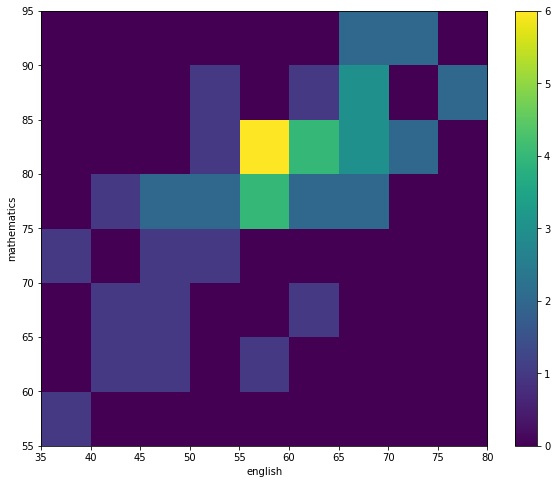

In [68]:
# 2차원 데이터 시각화 방법

# 히트맵(heatmap)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9, 8], range=[(35, 80), (55, 95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax=ax)

plt.show()

In [104]:
# 추측통계의 기본

# 무작위추출 실습

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/User/Jupyter/statistical_analysis/data/ch4_scores400.csv')

scores = np.array([df['score']])
scores = np.squeeze(scores)

In [76]:
np.shape(scores)

(400,)

In [77]:
np.random.seed(0)
sample = np.random.choice(scores, 20, replace=False)

In [78]:
print(np.mean(scores), np.mean(sample))

69.53 68.6


In [79]:
for i in range(10):
    sample = np.random.choice(scores, 20, replace=False)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균 : ', np.mean(sample))

1번째 무작위 추출로 얻은 표본평균 :  66.1
2번째 무작위 추출로 얻은 표본평균 :  66.95
3번째 무작위 추출로 얻은 표본평균 :  68.25
4번째 무작위 추출로 얻은 표본평균 :  70.85
5번째 무작위 추출로 얻은 표본평균 :  69.0
6번째 무작위 추출로 얻은 표본평균 :  69.85
7번째 무작위 추출로 얻은 표본평균 :  67.6
8번째 무작위 추출로 얻은 표본평균 :  70.7
9번째 무작위 추출로 얻은 표본평균 :  70.1
10번째 무작위 추출로 얻은 표본평균 :  63.0


In [105]:
# 불공정한 주사위 실습
dice = [i+1 for i in range(6)]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [93]:
result = np.random.choice(dice, p=prob)
print(result)

6


In [106]:
# 여러 번 수행 후 도수분포표 및 히스토그램 시각화

num_trial = 1000
sample = np.random.choice(dice, num_trial, p=prob)
#print(sample)

# 도수분포표

freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq, 'relative frequency':freq / num_trial}, index=pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,54,0.054
2,97,0.097
3,148,0.148
4,185,0.185
5,219,0.219
6,297,0.297


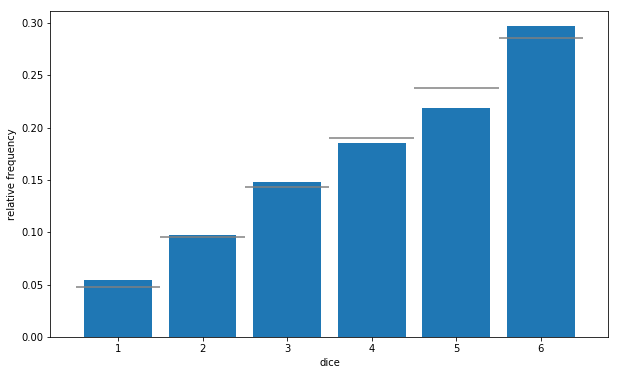

In [110]:
# 히스토그램

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()